In [1]:
import sys, os
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
%matplotlib inline

In [3]:
%load_ext pycodestyle_magic
%pycodestyle_on 
%pycodestyle_off

In [4]:
# !pip install advent-of-code-data
# https://github.com/wimglenn/advent-of-code-data #for input parsing/loading
from aocd import get_data  # simple, #get_data(day=24, year=2021)
from aocd.models import Puzzle

In [151]:
#  run ONCE
import datetime
today = datetime.datetime.now().day
puzzle = Puzzle(year=2022, day=7)
# print(puzzle.user)
print(puzzle.input_data_fname[60:])
print(puzzle.example_input_data_fname[60:])




iA = puzzle.input_data
iE = puzzle.example_data 
fA = puzzle.example_input_data_fname
print(puzzle.example_input_data_fname)
#ls_list=[line.strip() for line in open(fA, 'r')][0]
print(iE)

print('easteregg: ',puzzle.easter_eggs)

2022_07_input.txt
2022_07_example_input.txt
C:\Users\joachim.verhelst\.config\aocd\github.Ryton.1321098\2022_07_example_input.txt
$ cd /
$ ls
dir a
14848514 b.txt
8504156 c.dat
dir d
$ cd a
$ ls
dir e
29116 f
2557 g
62596 h.lst
$ cd e
$ ls
584 i
$ cd ..
$ cd ..
$ cd d
$ ls
4060174 j
8033020 d.log
5626152 d.ext
7214296 k
easteregg:  [<span title="E099 PROGRAMMER IS OVERLY POLITE">Error</span>]


In [160]:
i= iA #i= iE for testcase


ls_list=i.split('\n')
count_,dir_=[],[]
count=0

print(ls_list)


['$ cd /', '$ ls', 'dir ddgtnw', 'dir dtmbp', 'dir dzbfsf', 'dir fwrlqs', '305959 jjq.hjd', 'dir qjnnw', '$ cd ddgtnw', '$ ls', 'dir gftgshl', 'dir grct', '57336 tbqpqfgd.wvz', '267191 vqms', 'dir wtgzgmvr', '$ cd gftgshl', '$ ls', 'dir mtshhn', 'dir smnslwd', 'dir znbs', '$ cd mtshhn', '$ ls', '244930 fsclsm', '197930 vnnf', '$ cd ..', '$ cd smnslwd', '$ ls', '205127 dbtvp.mbr', 'dir grct', '270601 hcjtjptg', '146538 lsqvg.zmm', '310443 vnnf', '84541 vqms', '$ cd grct', '$ ls', '20977 jjq.hjd', '$ cd ..', '$ cd ..', '$ cd znbs', '$ ls', '192316 pjrpqc.gwh', '5233 tnqpmbjf.prg', '$ cd ..', '$ cd ..', '$ cd grct', '$ ls', '297156 qzlmfj.lhc', '104088 vnnf', '$ cd ..', '$ cd wtgzgmvr', '$ ls', 'dir cfvjph', 'dir jzdqctm', '153202 slcz', '$ cd cfvjph', '$ ls', '201215 tlms', '$ cd ..', '$ cd jzdqctm', '$ ls', 'dir hnbjcm', '112648 jjq.hjd', '319899 lhzjrmsd', '118481 pclps', '226538 pfnmnm', 'dir vdzsn', '148960 wmvd', 'dir zvh', '$ cd hnbjcm', '$ ls', '147907 ddgtnw.tpg', 'dir hgh', '107

In [179]:

def build_count_dir_levellists(ls_list):
    dirlevel = 0
    dir_=[]
    level_=[]
    dir_.append('~')
    level_.append(dirlevel)
    count_= []
    count = 0
    n=0

    for line in ls_list:
        text =line.split(' ')
        if '$ ls' in line:        
            count_.append(count) # PREVIOUS count
            #print(count)
            count = 0
        elif '$ cd ..' in line:
            dirlevel -= 1
            #count = 0
            pass
        elif '$ cd ' in line: #go to dir.
            to_dir =text[2] # 0 = '$', 1 =='cd'
            dirlevel += 1
            dir_.append(' '*dirlevel + text[2])
            level_.append(dirlevel)

            # debug
            #print(dirlevel,':', ' '*dirlevel,':',text[2],':(prev)',count) #dir structure

            pass
        elif 0: #// 'dir' in line:
            dir_.append(' '*dirlevel + text[2])
            level_.append(dirlevel)
            dirlevel += 0

            ## calculate indirect links.
        else:
            try:
                count += int(text[0])
            except:
                pass

    # still append last one
    count_.append(count) # PREVIOUS count
    return level_, dir_,count_
    #print(count)
        #dir_.append(' '*dirlevel + text[1])
level_, dir_,count_ = build_count_dir_levellists(ls_list)
dict_ = dict(zip(dir_,count_))
dict_level = dict(zip(dir_,level_))


In [180]:
print(count_)

[0, 305959, 324527, 0, 442860, 1017250, 20977, 197549, 401244, 153202, 201215, 926526, 255575, 64701, 195688, 295512, 0, 456982, 263149, 42151, 301547, 111901, 0, 260848, 0, 174135, 316186, 319757, 249643, 612334, 444764, 714253, 18055, 54154, 311269, 501094, 118657, 395843, 9663, 132576, 0, 157147, 0, 305103, 629852, 333756, 293242, 0, 297744, 142287, 172760, 0, 19043, 301193, 339770, 459695, 0, 72138, 19296, 817317, 271132, 340206, 542874, 133558, 754541, 224423, 0, 283246, 40705, 0, 223815, 10109, 289944, 718994, 179897, 263372, 768477, 0, 258006, 244040, 196291, 322572, 320992, 183532, 372424, 0, 132838, 184809, 524185, 0, 13693, 0, 0, 258910, 722311, 515871, 481072, 0, 84994, 0, 0, 128046, 15634, 240233, 0, 27078, 343238, 18002, 282291, 159577, 34331, 232581, 701825, 416749, 231700, 0, 189827, 3424, 152369, 308054, 0, 0, 165188, 319798, 500143, 124212, 87770, 583729, 98292, 0, 244157, 426858, 348882, 0, 318705, 0, 304509, 116769, 246522, 109428, 286205, 0, 588278, 316061, 228925, 

In [215]:
#print(len(count_))
#print(len(dir_))
#print(dict_)
#iputs:
import copy
#print(count_,dir_,level_)
#level_,dir_,count_

#print(len(level_),len(dict_)) # = dont use dict!!

'''reverse_level=level_[::-1]
reverse_count = count_[::-1]
reverse_dir = dir_[::-1]
'''

def build_cumul(count_,dir_,level_):
    nelems = len(count_)
    count_cumul = np.zeros([len(count_)]) # size of count,zeros

    for index in range(nelems): #0
        #print(index)
        ccount = 0

        level = level_[index]
        stop = False
        #ccount =0
        for i in range(index,nelems): #[k for k in range(index,nelems)]:       
            
            if not(stop):
                if (index == i): # count start dir too, sum them
                    count_cumul[index] += count_[i] 
                    ccount += count_[i]
                    pass #either already in count, or if zero, add it!
                elif (level_[i] > level) : # while subdirs, sum them
                    count_cumul[index] += count_[i]
                    ccount += count_[i]
                    
                elif level_[i] <= level: # if you drop or find an equal level in the list, stop the count for this higher level dir!
                    stop = True
                    #print(i, 'end of index',index)
                    #print(ccount)



    #print(count_cumul)
    return(count_cumul)

def solve_a(count_,dir_,level_):
    count_cumul=build_cumul(count_,dir_,level_)
    #print(count_cumul)


    answA = sum([n if (n<100000) else 0 for n in count_cumul]) # NOT OK, should exclude large subdirs => take structure into account.
    print('Answ A: ',int(answA))
    return answA,count_cumul




#answA,count_cumul= solve_a(count_,dir_,level_) # first debug build_cumul

'''
For debugging:
'''
#count_cumul=build_cumul([0,10,20,30],['a','b','c','d',],[0,3,2,3])
#print(count_cumul)

#i= iA 
i= iA # for testcase


ls_list=i.split('\n')
count_,dir_=[],[]
count=0
level_, dir_,count_ = build_count_dir_levellists(ls_list)
#dict_ = dict(zip(dir_,count_))
#dict_level = dict(zip(dir_,level_))
answA,count_cumul= solve_a(count_,dir_,level_) # first debug build_cumul
answA = int(answA)

print('Total in each(w subdirs):')
print('*'*50)
for (i,j,k) in zip(level_,count_cumul,dir_):
    print('-',i,'-',k,', Size: ',j)
print(answA)

Answ A:  1334506
Total in each(w subdirs):
**************************************************
- 0 - ~ , Size:  46975962.0
- 1 -  / , Size:  46975962.0
- 2 -   ddgtnw , Size:  5672556.0
- 3 -    gftgshl , Size:  1678636.0
- 4 -     mtshhn , Size:  442860.0
- 4 -     smnslwd , Size:  1038227.0
- 5 -      grct , Size:  20977.0
- 4 -     znbs , Size:  197549.0
- 3 -    grct , Size:  401244.0
- 3 -    wtgzgmvr , Size:  3268149.0
- 4 -     cfvjph , Size:  201215.0
- 4 -     jzdqctm , Size:  2913732.0
- 5 -      hnbjcm , Size:  1573758.0
- 6 -       hgh , Size:  64701.0
- 6 -       qvnbfdq , Size:  948182.0
- 7 -        dzfpqb , Size:  295512.0
- 7 -        rvdlmnqv , Size:  456982.0
- 8 -         smnslwd , Size:  456982.0
- 6 -       tlms , Size:  263149.0
- 6 -       wlvg , Size:  42151.0
- 5 -      vdzsn , Size:  301547.0
- 5 -      zvh , Size:  111901.0
- 2 -   dtmbp , Size:  4095149.0
- 3 -    cscpfcjv , Size:  260848.0
- 3 -    hdjs , Size:  174135.0
- 4 -     tlms , Size:  174135.0
- 3

In [175]:
copydir_ = copy.deepcopy(dir)

sorted_dir = copydir_.sort()
print(sorted_dir)
for line in dir_:
    print(line)
if 0:
    print(answA)
    print(sum(count_))
    print(len(count_))
    print(len(dir_))
    print(len(level_))
    print(dir_)
    print(level_)

AttributeError: 'builtin_function_or_method' object has no attribute 'sort'

[5, 6, 7]


(0.0, 100000.0)

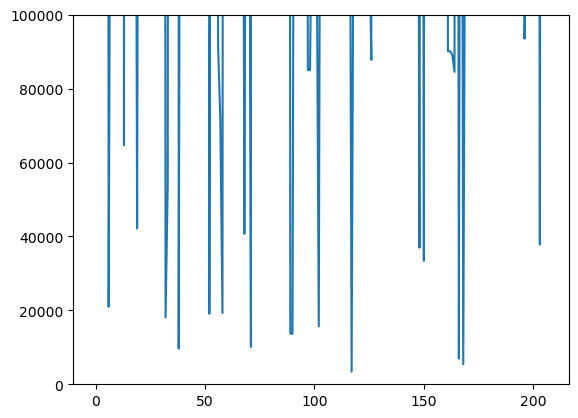

In [189]:
print([i for i in range(5,8)])
plt.plot(count_cumul) #
plt.ylim([0,1E5])

In [216]:
puzzle.answer_a = int(answA) # this submits!

In [211]:
TOTAL = 70000000
NEEDED = 30000000
now_free = TOTAL-count_cumul[0]
print(now_free)
to_free = NEEDED-now_free
print(to_free)

copy_count_cumul=copy.deepcopy(count_cumul)
copy_count_cumul.sort()

for i in copy_count_cumul:
    if i > to_free:
        print(i)
        answB=int(i)
        break
index =0
for j in count_cumul:
    index +=1
    if j==7421137:
        print(index)
#answB=7421137
print(answB)


23024038.0
6975962.0
7421137.0
73
7421137


In [ ]:
# test and solve part A
# iA,iE,

class a:
    def __init__(self, i=None):
        self.input = i
        pass

    def fun(self, params=None):
        print('hello')
        pass


def fun2(i=None):
    print('world')
    pass

In [ ]:
# i = iE
# a_obj = a(i)
# a_obj.fun()

answA = fun2(i=iE)
print(answA)

In [ ]:
# test and solve part B, use inputs & test inputs.

In [ ]:
answB= funB(i=iE)
print(answB)

In [212]:
puzzle.answer_b = answB # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 7! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
